In [2]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

import pandas as pd
import numpy as np 
import seaborn  as sns
import matplotlib.pyplot as plt

%matplotlib inline 
sns.set('notebook')

import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [3]:
# скачаємо файл
url = 'https://raw.githubusercontent.com/Illia061/StepProject/main/IKEA_SA_Furniture_Web_Scrapings_sss.csv'

df_ikea = pd.read_csv(url)


In [4]:
'''Step1 EDA'''
#Step 1: EDA - shape, head, tail, sample, info
'''
Аналізуємо набір данних магазину IKEA
На першому кроці аналізуємо та описуємо набір
Він має 3694 рядки та 14 стовпців
'''
df_ikea.shape

(3694, 14)

In [5]:
df_ikea.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [6]:
df_ikea.tail()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
3689,3689,99157902,ELVARLI,Wardrobes,750.0,SR 820,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,NaN,91.0
3690,3690,9158152,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0
3691,3691,59157541,ELVARLI,Wardrobes,924.0,"SR 1,050",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0
3692,3692,89157573,ELVARLI,Wardrobes,2745.0,"SR 3,130",True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,50.0,NaN,178.0
3693,3693,69157376,ELVARLI,Wardrobes,1231.0,"SR 1,535",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0


In [7]:
df_ikea.sample(5)

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
2293,2293,69304829,MARKERAD,Sofas & armchairs,1092.0,"SR 1,590",True,https://www.ikea.com/sa/en/p/markerad-day-bed-...,No,"Day-bed, 80x200 cm",IKEA of Sweden/Virgil Abloh,NaN,NaN,80.0
1593,1593,89297229,NORRÅKER / RÖNNINGE,Chairs,1976.0,"SR 2,125",True,https://www.ikea.com/sa/en/p/norraker-roenning...,No,"Table and 4 chairs, 125x74 cm",J Karlsson/N Karlsson/Maja Ganszyniec,NaN,NaN,74.0
3102,3102,39284677,BEKANT,Tables & desks,2480.0,No old price,True,https://www.ikea.com/sa/en/p/bekant-conference...,Yes,"Conference table, 140 cm",K Malmvall/E Lilja Löwenhielm,NaN,73.0,140.0
2050,2050,30411415,SVANÖ,Outdoor furniture,495.0,No old price,True,https://www.ikea.com/sa/en/p/svanoe-arbor-benc...,No,"Arbor bench, 119x48 cm",Mikael Axelsson,48.0,179.0,119.0
1230,1230,410101,VIPPÄRT,Chairs,29.0,No old price,True,https://www.ikea.com/sa/en/p/vippaert-chair-cu...,No,"Chair cushion, 38x38x6.5 cm",IKEA of Sweden,38.0,NaN,38.0


In [8]:
df_ikea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


In [9]:
df_ikea.describe()
'''
Також бачимо, що деякі поля в depth, height та width не заповнені, але це ок, бо не всі меблі мають такі параметри
Стовпець Unnamed: 0 нам не потрібен, бо вони дублюють порядкові номери строк

З опису видно, що середня ціна 1078, мінімальна 3, а максимальна 9585
Середня ширина виробів 54, мінімальна 1, а максимальна 257
Середня висота виробів 101.6, мінімальна 1, а максимальна 700
Середня довжина виробів 104.5, мінімальна 1, а максимальна 420
'''

'\nТакож бачимо, що деякі поля в depth, height та width не заповнені, але це ок, бо не всі меблі мають такі параметри\nСтовпець Unnamed: 0 нам не потрібен, бо вони дублюють порядкові номери строк\n\nЗ опису видно, що середня ціна 1078, мінімальна 3, а максимальна 9585\nСередня ширина виробів 54, мінімальна 1, а максимальна 257\nСередня висота виробів 101.6, мінімальна 1, а максимальна 700\nСередня довжина виробів 104.5, мінімальна 1, а максимальна 420\n'

In [10]:
'''
Перевіримо на унікальність
Унікальних 2962 вироби з 3694
'''
df_ikea['item_id'].nunique()

2962

In [11]:
'''
Перевіримо чи не дублюються строки
Дублікатів не має, а повторюваність у item_id скоріше визвана зміною ціни або категорії
'''
df_ikea.duplicated(subset=['item_id', 'name']).sum()
df_ikea.duplicated(subset=['item_id', 'name', 'category', 'price', 'old_price']).sum()

0

In [12]:
'''
Видалимо стовпець, який дублює нумерацію
'''
df_ikea.drop('Unnamed: 0', axis = 1, inplace= True)


In [13]:
'''
Видалимо дублікати і залишимо останній запис з повторюваних
'''
df_no_duplicates = df_ikea.drop_duplicates(subset=['item_id', 'name'], keep='last')

In [14]:
df_no_duplicates.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
17,50363649,KULLABERG,Bar furniture,140.0,SR 175,True,https://www.ikea.com/sa/en/p/kullaberg-stool-b...,Yes,Stool,Sarah Fager,36.0,NaN,36.0
47,29123958,MINNEN,Beds,395.0,SR 445,True,https://www.ikea.com/sa/en/p/minnen-ext-bed-fr...,No,"Ext bed frame with slatted bed base, ...",IKEA of Sweden/Tina Christensen,NaN,NaN,85.0
48,49278341,BRIMNES,Beds,895.0,SR 925,True,https://www.ikea.com/sa/en/p/brimnes-bed-frame...,No,"Bed frame w storage and headboard, ...",IKEA of Sweden/K Hagberg/M Hagberg,54.0,110.0,96.0
50,89326463,PLATSA,Beds,2111.0,"SR 2,205",True,https://www.ikea.com/sa/en/p/platsa-bed-frame-...,No,"Bed frame with 4 drawers, 140...",Ola Wihlborg/IKEA of Sweden,40.0,43.0,140.0


In [15]:
df_no_duplicates.describe()

,item_id,price,depth,height,width
count,2.962000e+03,2962.000000,1844.000000,2236.000000,2520.000000
mean,4.877244e+07,1108.722552,55.920824,105.325581,109.268254
std,2.896535e+07,1393.576103,31.015201,63.166967,73.464503
min,5.848700e+04,3.000000,1.000000,1.000000,1.000000
25%,2.039630e+07,200.000000,38.000000,70.000000,60.000000
50%,4.928075e+07,570.000000,47.000000,84.000000,80.000000
75%,7.042306e+07,1475.000000,62.000000,136.000000,150.000000
max,9.993262e+07,9585.000000,257.000000,700.000000,420.000000


In [16]:
'''
Видалимо стовпець із старою ціною, бо він нам не потрібен
'''
df_no_duplicates.drop('old_price', axis = 1, inplace= True)

C:\Users\Analytic\AppData\Local\Temp\ipykernel_8828\3643111540.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates.drop('old_price', axis = 1, inplace= True)


In [17]:
'''
Скинемо індекси
'''
data=df_no_duplicates.reset_index(drop=True)
data.head()


,item_id,name,category,price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
1,50363649,KULLABERG,Bar furniture,140.0,True,https://www.ikea.com/sa/en/p/kullaberg-stool-b...,Yes,Stool,Sarah Fager,36.0,NaN,36.0
2,29123958,MINNEN,Beds,395.0,True,https://www.ikea.com/sa/en/p/minnen-ext-bed-fr...,No,"Ext bed frame with slatted bed base, ...",IKEA of Sweden/Tina Christensen,NaN,NaN,85.0
3,49278341,BRIMNES,Beds,895.0,True,https://www.ikea.com/sa/en/p/brimnes-bed-frame...,No,"Bed frame w storage and headboard, ...",IKEA of Sweden/K Hagberg/M Hagberg,54.0,110.0,96.0
4,89326463,PLATSA,Beds,2111.0,True,https://www.ikea.com/sa/en/p/platsa-bed-frame-...,No,"Bed frame with 4 drawers, 140...",Ola Wihlborg/IKEA of Sweden,40.0,43.0,140.0


In [18]:
'''
Перевіримо дані у стовпцях на адекватність
'''
data['other_colors'].unique()
data['category'].unique()
data['designer'].unique()
'''
Стовпець дизайнери має нерелевантні дані, в яких не вказано дизайнера
'''
data['designer'][data['designer'].str.contains('\d', na=False)].nunique()

data['width'].dtype
data['height'].dtype
data['depth'].dtype

dtype('float64')

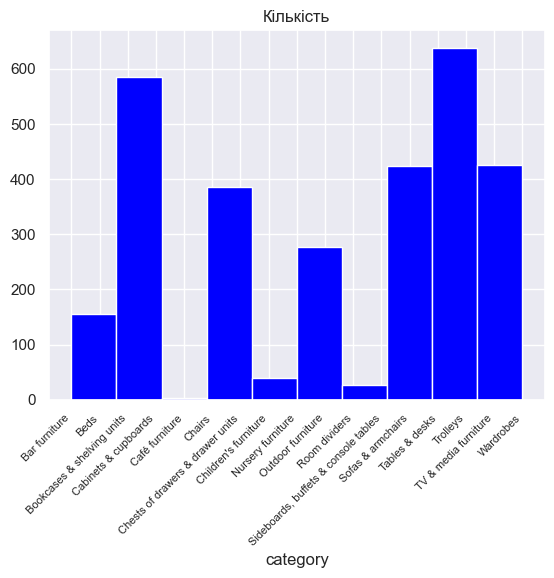

'\nНайбільша кількість у категріях Bookcases & shelving units та Trolleys\n'

In [19]:
'''
Кількість по кожній категорії
'''
plt.hist(data['category'], color='blue')
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.xlabel('category')
plt.title('Кількість')
plt.show()
'''
Найбільша кількість у категріях Bookcases & shelving units та Trolleys
'''

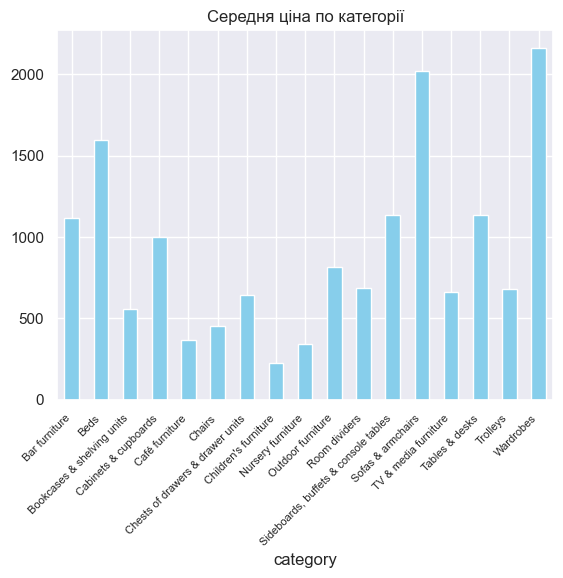

'\nНайдорожчими категріями є Wardrobes, Sofa & armchairs та Beds\nНайдешевими категріями є Childrens furniture, Nursery furniture, Cafe furniture та Chairs\n'

In [20]:
'''
Середня ціна по категорії
'''
average_prices = data.groupby('category')['price'].mean()
average_prices.plot(kind='bar', color='skyblue')
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.xlabel('category')
plt.title('Середня ціна по категорії')
plt.show()
'''
Найдорожчими категріями є Wardrobes, Sofa & armchairs та Beds
Найдешевими категріями є Childrens furniture, Nursery furniture, Cafe furniture та Chairs
'''

<Axes: xlabel='category', ylabel='price'>

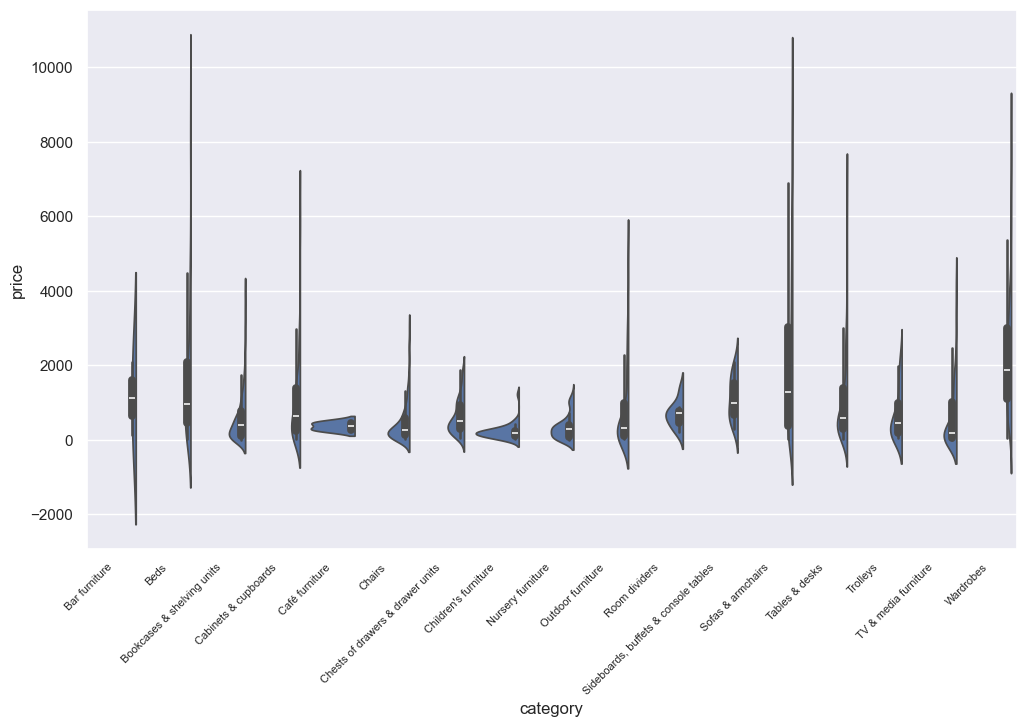

In [82]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=45, ha="right", fontsize=8)
sns.violinplot(data= data, x = 'category', y = 'price', split = True)
'''
Найбільші викиди ціни у катеоріях Wardrobes, Sofa & armchairs та Beds - що і пояснює їх високу середню ціну
Категорії Childrens furniture, Nursery furniture, Cafe furniture є найбільш збалансованими, і мають найменшу середню ціну
'''

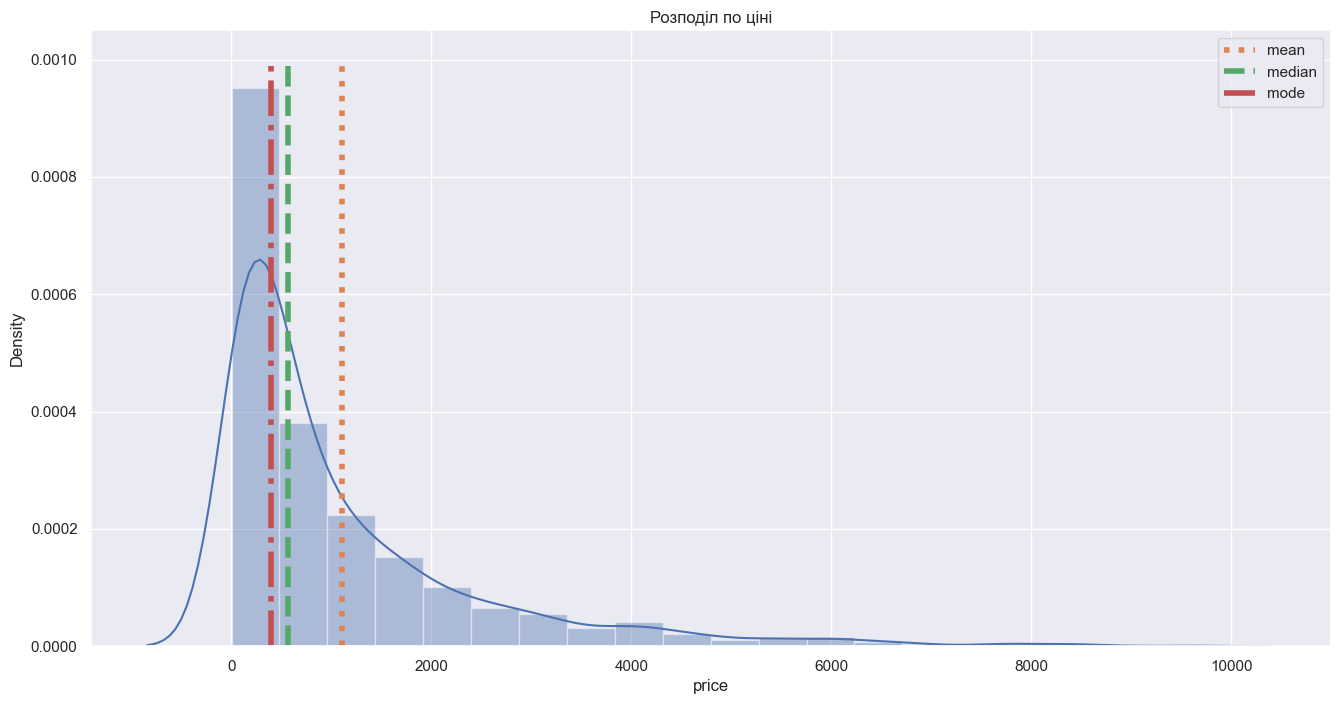

'\nПриблизно половина речей мають ціну меншу 500\n'

In [57]:
target_mean = round(data['price'].mean(), 2)
target_median = data['price'].median()
target_mode = data['price'].mode()[0]

plt.figure(figsize=(16,8))
sns.distplot(data['price'], bins=20)
plt.title('Розподіл по ціні')

y=np.linspace(0, 0.001, 10)
plt.plot([target_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 10, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 10, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Розподіл по ціні')
plt.legend()
plt.show()

'''
Приблизно половина речей мають ціну меншу 500, при цьому середня ціна становить близько 1100
'''

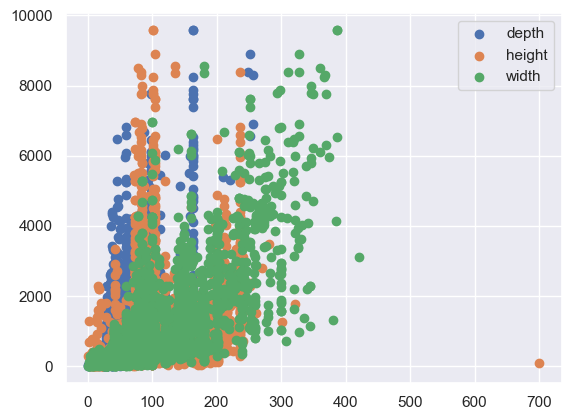

In [22]:
'''
Аналізуючи залежність ціни від розмірів можна побачити, що найбільша залежність ціни від довжини і хітмап це підтверждує
'''
plt.scatter(x=data['depth'], y=data['price'])
plt.scatter(x=data['height'], y=data['price'])
plt.scatter(x=data['width'], y=data['price'])
plt.legend(labels=['depth', 'height','width'])

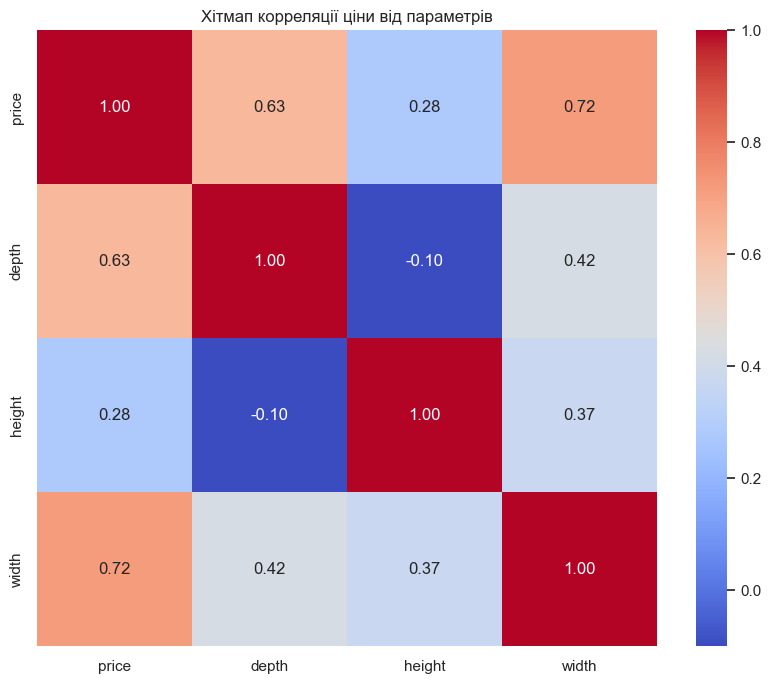

In [23]:
numeric_columns = ['price', 'depth', 'height', 'width']
numeric_data = data[numeric_columns]

# Створюємо корреляційну матрицю
correlation_matrix = numeric_data.corr()

# Створюємо хітмап
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Настроим подписи осей и заголовок
plt.title('Хітмап корреляції ціни від параметрів')
plt.show()

In [24]:
'''
Додамо стовпець об'ем меблів и розглянемо залежність ціни від об'ему
Бачимо, що залежність не велика 0,64
'''
for index, row in data.iterrows():
    if pd.isnull(row['depth']) and pd.isnull(row['height']) and pd.isnull(row['width']):
        # Если значения в столбцах "depth", "height", "width" равны NaN, устанавливаем значение "area" равным 1
        data.at[index, 'volume'] = np.nan
    elif pd.notna(row['depth']) and pd.isnull(row['height']) and pd.notna(row['width']):
        data.at[index, 'volume']=data.at[index,'depth']*data.at[index,'width']
    elif pd.isnull(row['depth']) and pd.notna(row['height']) and pd.notna(row['width']):
        data.at[index, 'volume']=data.at[index,'height']*data.at[index,'width']
    elif pd.notna(row['depth']) and pd.notna(row['height']) and pd.isnull(row['width']):
        data.at[index, 'volume']=data.at[index,'height']*data.at[index,'depth']
    elif pd.notna(row['depth']) and pd.isnull(row['height']) and pd.isnull(row['width']):
        data.at[index, 'volume']=data.at[index,'depth']
    elif pd.isnull(row['depth']) and pd.notna(row['height']) and pd.isnull(row['width']):
        data.at[index, 'volume']=data.at[index,'height']
    elif pd.isnull(row['depth']) and pd.isnull(row['height']) and pd.notna(row['width']):
        data.at[index, 'volume']=data.at[index,'width']
    else: data.at[index, 'volume']=data.at[index,'width']*data.at[index,'height']*data.at[index,'depth']
data.head()

,item_id,name,category,price,sellable_online,link,other_colors,short_description,designer,depth,height,width,volume
0,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,NaN
1,50363649,KULLABERG,Bar furniture,140.0,True,https://www.ikea.com/sa/en/p/kullaberg-stool-b...,Yes,Stool,Sarah Fager,36.0,NaN,36.0,1296.0
2,29123958,MINNEN,Beds,395.0,True,https://www.ikea.com/sa/en/p/minnen-ext-bed-fr...,No,"Ext bed frame with slatted bed base, ...",IKEA of Sweden/Tina Christensen,NaN,NaN,85.0,85.0
3,49278341,BRIMNES,Beds,895.0,True,https://www.ikea.com/sa/en/p/brimnes-bed-frame...,No,"Bed frame w storage and headboard, ...",IKEA of Sweden/K Hagberg/M Hagberg,54.0,110.0,96.0,570240.0
4,89326463,PLATSA,Beds,2111.0,True,https://www.ikea.com/sa/en/p/platsa-bed-frame-...,No,"Bed frame with 4 drawers, 140...",Ola Wihlborg/IKEA of Sweden,40.0,43.0,140.0,240800.0


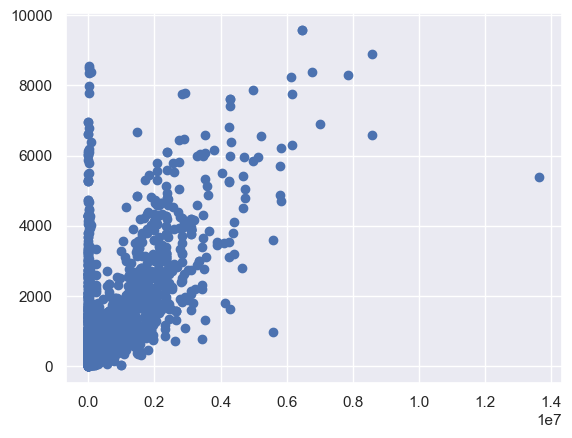

In [25]:
plt.scatter(x=data['volume'], y=data['price'])

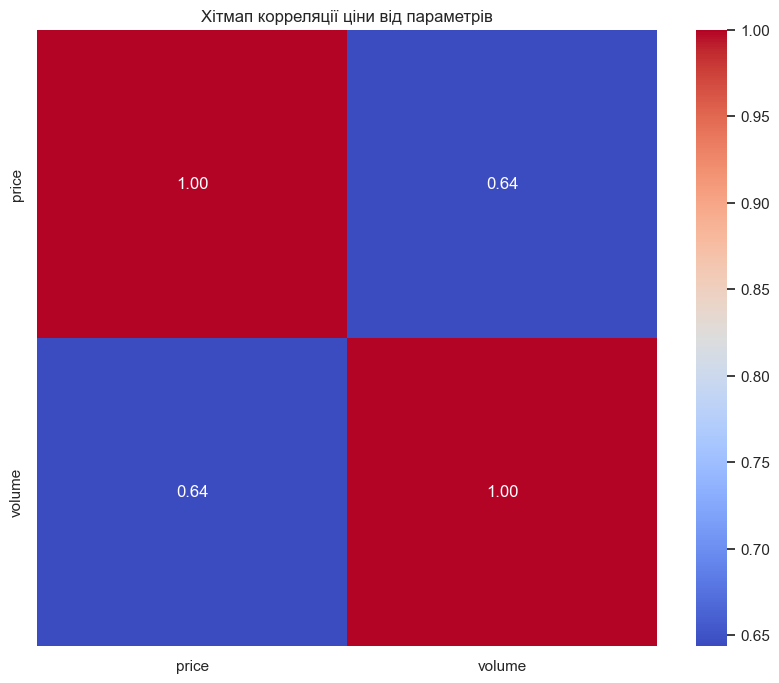

In [26]:
numeric_columns = ['price', 'volume']
numeric_data = data[numeric_columns]

# Створюємо корреляційну матрицю
correlation_matrix = numeric_data.corr()

# Створюємо хітмап
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Хітмап корреляції ціни від параметрів')
plt.show()

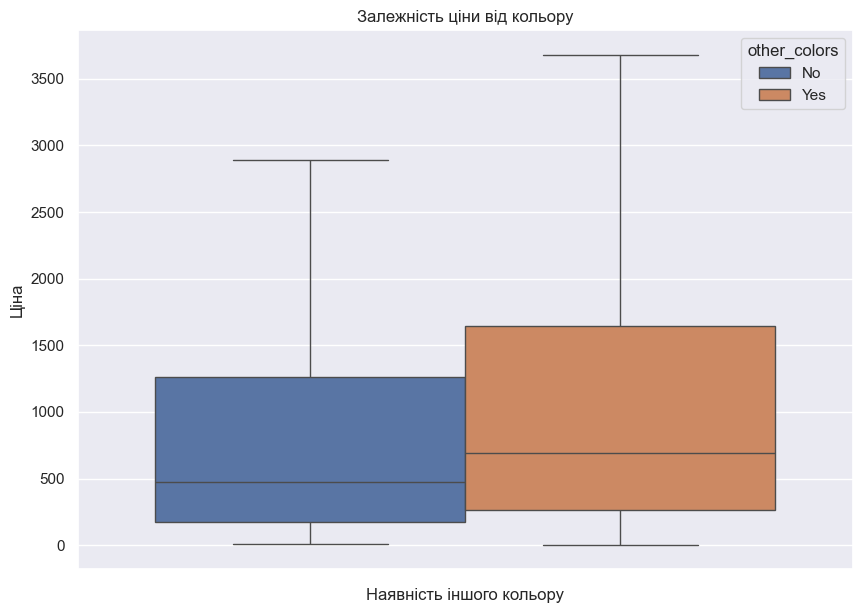

In [87]:
'''
Проаналізуємо залежність ціни від кольору за допомогою ящику з вусами
Можна зробити висновок, що товари, які мають інший колір, коштують дорожче і медіана ціни в них більша
'''

plt.figure(figsize=(10,7))
sns.boxplot(data = data, hue = 'other_colors', y = 'price', showfliers=False)
plt.title('Залежність ціни від кольору')
plt.xlabel('Наявність іншого кольору')
plt.ylabel('Ціна')

plt.show()